# Final Project Submission

Please fill out:
* Student name: Eric Wambua Njeru
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: MaryAnn Mwikali
* Blog post URL:


## Microsoft Movie Set Up Analysis


### Overview
This project is purposed to carry out analysis and to give counsel to Microsoft Company in their venture into movie production, equipping the company with valuable insights and actionable recommendations to navigate the challenges and opportunities they will face in the business.

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Objectives

Microsoft has decided to venture into movie business but unfortunately they have no previous experience on the same. Using the various datasets provided, this project will endeavour to give the company insights during their start-up.

My analysis will be aimed towards answering the following qiestions;
    
    1. Which genres of movies are mostly consumed
    2. Movie genres with the highest Return on Investments
    3. The correlation between production budget and the profits
    4. Top movie studios that Microsoft will be competing against
    5. Effect of Studio Popularity on Gross
    6. relation between movie run time and its ratings
    

In [1]:
# Import libraries to be used
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Data Reading and Cleaning
I will first read the relevant data provided and then clean them. This will enable me study the data, analyse it and draw conclusions without misguiding Microsoft.

In [4]:
#read the title basic csv
TitleBasic = pd.read_csv('Data/title.basics.csv')
TitleBasic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
TitleBasic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The TitleBasic dataframe contains 146144 rows and 6 columns 

In [6]:
#read the title ratings csv to get the insight of its df
TitleRating = pd.read_csv('Data/title.ratings.csv')
TitleRating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
TitleRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The TitleRating df has 73856 rows and just 3 columns which all seem not to be having  non-null entries. The column tconst seem to match the one on TitleBasic

In [8]:
#Read the Movie gross csv
MovieGross = pd.read_csv('Data/bom.movie_gross.csv')
MovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
MovieGross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The MovieGross df contains 3387 rows and 5 columns. However the foreign_gross contains object data types hence will be hard to manipulate. We need to work around this by converting them to floats so as to match the domestic_gross


In [215]:
# Convert foreign_gross data type from object to float

#MovieGross['foreign_gross'] = MovieGross['foreign_gross'].astype(float)
#MovieGross.info()

In [18]:
# Remove commas from df['foreign_gross'] column in order to convert type to float

MovieGross['foreign_gross'].replace(',','', regex=True, inplace=True)


MovieGross['foreign_gross'] = MovieGross['foreign_gross'].astype(float)
MovieGross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [19]:
#Join TitleRating and TitleBasics on tconst

RatingNBasic = TitleRating.join(TitleBasic.set_index('tconst'),how = 'inner',on = 'tconst')
RatingNBasic

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


The above data frame seems to contain two identical rows i.e primary_title and original_title. we can find out if all the entries in the two columns are same

In [20]:
#Check if the columnd primary title and original title  are identical
equalTitle = RatingNBasic.primary_title ==RatingNBasic.original_title
count = equalTitle.value_counts()

print(count)

True     61683
False    12173
dtype: int64


The two columns have many similar entries but also has a significant number of entries that are not the same. it would be a bad idea to drop one column in that case. However we can rename primary title to just title to enable join the RatingNBasic df to MovieGross df

In [21]:
#Rename the primary_title column to title

RatingNBasic.rename(columns={'primary_title': 'title'}, inplace=True)
RatingNBasic.head()

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [24]:
#Join RatingNBasic to MovieGross df using the Name column

Rating_Basic_Gross = RatingNBasic.join(MovieGross.set_index('title'),how = 'inner',on = 'title')
Rating_Basic_Gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 3 to 73552
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   title            3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 307.4+ KB


The new dataframe (Rating_Basic_Gross) contains 3027 rows and 12 columns. Some  columns i.e runtime_minutes,genre and studio have few non-null values which can be easily dropped as replacing them would to some extent mislead us. Domestic_gross and foreign_gross too contain 3005 and 1832 non-null values respectively. Droping foreign-gross would significantly reduce our dataset and so I felt it was not a good idea.However I made an assumption that there were specific movies designated for either domestic or foreign consumption. This could explain the missing values in the respective columns,so I decided to retain them but replace them with a float 0.0 for easy summations. I decided to add a column total_gross to our data frame which is a summation of domestic and foreign gross.This will help get a wider view how the movies performed both internationally and locally. Microsoft is a renowned company globally and so the management would be intrested in both the local and foreign markets

In [25]:
#drop the non-null entries in runtime_minutes,genres and studio columns
y = Rating_Basic_Gross.dropna(subset=['runtime_minutes','genres','studio'],inplace=True)
Rating_Basic_Gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 3 to 73552
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2972 non-null   object 
 1   averagerating    2972 non-null   float64
 2   numvotes         2972 non-null   int64  
 3   title            2972 non-null   object 
 4   original_title   2972 non-null   object 
 5   start_year       2972 non-null   int64  
 6   runtime_minutes  2972 non-null   float64
 7   genres           2972 non-null   object 
 8   studio           2972 non-null   object 
 9   domestic_gross   2952 non-null   float64
 10  foreign_gross    1787 non-null   float64
 11  year             2972 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 301.8+ KB


In [26]:
#replace missing values in domestic and foreign colunmns with zero as a float
Rating_Basic_Gross['domestic_gross'].fillna(0.0, inplace=True)
Rating_Basic_Gross['foreign_gross'].fillna(0.0, inplace=True)

# Print information summary of the DataFrame
Rating_Basic_Gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 3 to 73552
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2972 non-null   object 
 1   averagerating    2972 non-null   float64
 2   numvotes         2972 non-null   int64  
 3   title            2972 non-null   object 
 4   original_title   2972 non-null   object 
 5   start_year       2972 non-null   int64  
 6   runtime_minutes  2972 non-null   float64
 7   genres           2972 non-null   object 
 8   studio           2972 non-null   object 
 9   domestic_gross   2972 non-null   float64
 10  foreign_gross    2972 non-null   float64
 11  year             2972 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 301.8+ KB


In [27]:
# Add a new column 'total_gross' which is a sum of domestic_gross and foreign_gross values

Rating_Basic_Gross['total_gross'] = Rating_Basic_Gross['domestic_gross'] + Rating_Basic_Gross['foreign_gross']
Rating_Basic_Gross.head()

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,total_gross
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014,61200000.0
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,2013,22487000.0
12,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,0.0,3400000.0,2014,3400000.0
16,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011,110200000.0
17,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010,105200000.0


### Data Analysis
The data frame is now clean and ready to be interogated to answer major stakeholders questions such as 1. Which genres of movies had the highest total_gross 2. Movie genres with the highest averagerating 3. Relation between averagerating and total_gross. To answer my questions I decide to work with specific columns as others may not make sense. The genre column contains some entries that have more than one description so I will split them

In [81]:
#drop columns that I felt were not to be used in my inquiry
columns_to_drop = ['tconst', 'title', 'original_title', 'start_year', 'year']
MyData1 = Rating_Basic_Gross.drop(columns_to_drop, axis=1)
MyData1.head()

,averagerating,numvotes,runtime_minutes,genres,studio,domestic_gross,foreign_gross,total_gross
3,4.2,50352,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,61200000.0
10,5.1,8296,96.0,Comedy,FoxS,21600000.0,887000.0,22487000.0
12,7.0,5494,94.0,"Adventure,Animation,Drama",Shout!,0.0,3400000.0,3400000.0
16,7.6,326657,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,110200000.0
17,6.5,87288,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,105200000.0


In [82]:
#split the genre column to detach multiple. make a copy of MyData1 so as not to multilate it
SplitData1 =MyData1.copy() 
SplitData1['genres'] = SplitData1['genres'].str.split(',').copy()
SplitData1 = SplitData1.explode('genres')
SplitData1

,averagerating,numvotes,runtime_minutes,genres,studio,domestic_gross,foreign_gross,total_gross
3,4.2,50352,99.0,Action,LG/S,18800000.0,42400000.0,61200000.0
3,4.2,50352,99.0,Adventure,LG/S,18800000.0,42400000.0,61200000.0
3,4.2,50352,99.0,Fantasy,LG/S,18800000.0,42400000.0,61200000.0
10,5.1,8296,96.0,Comedy,FoxS,21600000.0,887000.0,22487000.0
12,7.0,5494,94.0,Adventure,Shout!,0.0,3400000.0,3400000.0
...,...,...,...,...,...,...,...,...
73548,7.0,18768,115.0,Biography,Focus,6800000.0,5000000.0,11800000.0
73548,7.0,18768,115.0,Drama,Focus,6800000.0,5000000.0,11800000.0
73552,7.7,11168,113.0,Crime,Cohen,1000000.0,0.0,1000000.0
73552,7.7,11168,113.0,Drama,Cohen,1000000.0,0.0,1000000.0


In [83]:
#Group the data by genre and get the mean of the other columns
SplitData1.groupby('genres').mean()

,averagerating,numvotes,runtime_minutes,domestic_gross,foreign_gross,total_gross
genres,,,,,,
Action,6.284507,123331.161189,115.502347,5.938728e+07,1.060993e+08,1.654866e+08
Adventure,6.478360,157429.473804,110.446469,9.499375e+07,1.771962e+08,2.721899e+08
Animation,6.707285,86148.046358,96.125828,8.787099e+07,1.666710e+08,2.545420e+08
Biography,6.973333,60004.003509,112.263158,2.052287e+07,2.544533e+07,4.596821e+07
Comedy,6.253486,59253.959695,105.216776,3.423034e+07,4.956310e+07,8.379343e+07
Crime,6.482368,75215.852632,111.315789,2.415079e+07,2.609907e+07,5.024986e+07
Documentary,7.291441,5626.815315,89.301802,1.286212e+07,1.426455e+07,2.712667e+07
Drama,6.594518,47978.765724,110.204270,1.627426e+07,2.271430e+07,3.898856e+07
Family,6.255263,50556.114035,101.622807,4.826815e+07,7.267457e+07,1.209427e+08


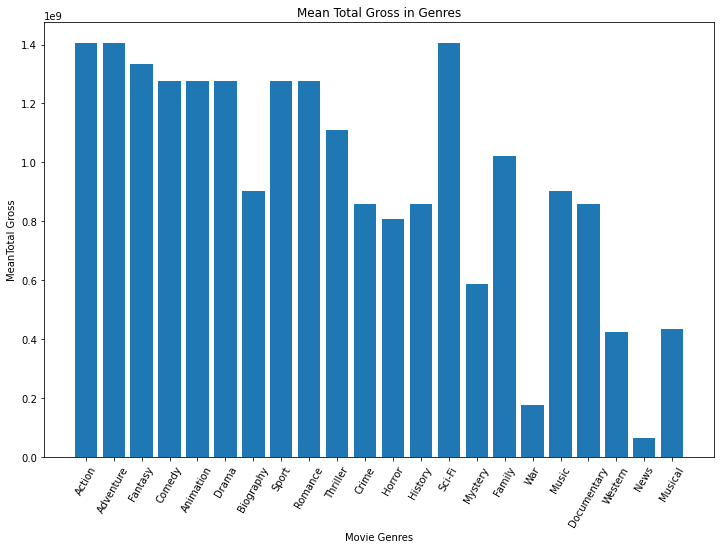

In [84]:
#plot a bar graph of the genre vs total gross relation

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(SplitData1['genres'],SplitData1['total_gross'])
ax.set_ylabel('MeanTotal Gross')
ax.set_xlabel('Movie Genres')
plt.xticks(rotation =60)
ax.set_title('Mean Total Gross in Genres')
plt.show();

The bar graph above shows that Action,Adventure,Sci-Fi and Fantacy Genres had the highest total gross figures which could translate to that they were top four consumed genres,assuming that the price of single unit movie was same irrespective of the genre. Next we can compare the average ratings of each genre based on our data

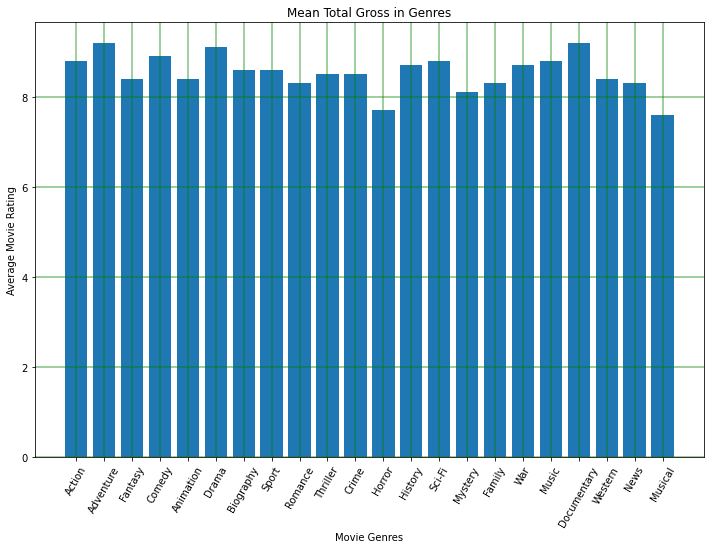

In [85]:
#plot a bar graph of the genre vs average rating relation

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(SplitData1['genres'],SplitData1['averagerating'])
ax.set_ylabel('Average Movie Rating')
ax.set_xlabel('Movie Genres')
plt.xticks(rotation =60)
ax.set_title('Mean Total Gross in Genres')
plt.grid(color='green',linewidth=1.5,alpha=1.5)
plt.show();

The Adventure,Drama and Documentary genres were the top three based on their ratings. This translates to that the three genres were most appreciated by the viewers. Adventure movies seem to have higher ratings as well as high total gross. This would be an ideal venture as it would likely expose Microsoft studio to larger audience. The relation between average ratings and total gross would be an area to look into. This will tell whether a movies rating affects its total gross. lets look into that below

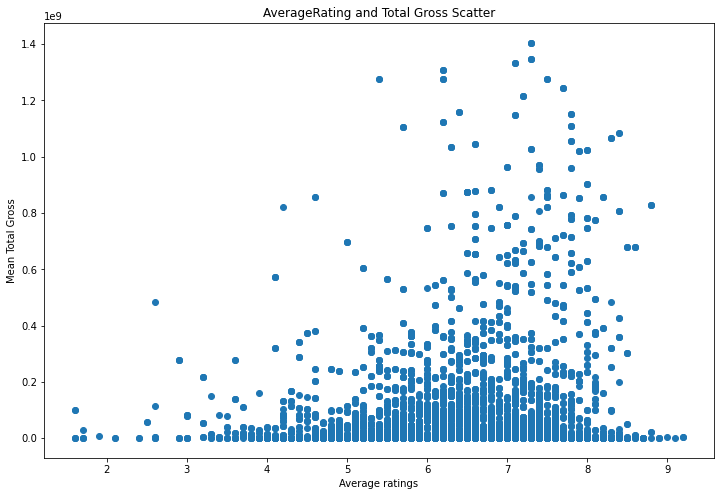

In [64]:
#plot a scatter plot to show the relation between averagerating and Total_gross

fig = plt.figure(figsize =(12,8))
plt.scatter(SplitData1['averagerating'],SplitData1['total_gross'])
plt.xlabel('Average ratings')
plt.ylabel('Mean Total Gross')
plt.title('AverageRating and Total Gross Scatter')

plt.show();

There seem to be a slight positive relation between average ratings and mean total gross. This could mean that the genres with higher ratings are likely to attract higher mean total gross. The more a movie is appreciated by the consumers, the more likely it is to fetch more income. Next I will look into how run time related to average ratings 

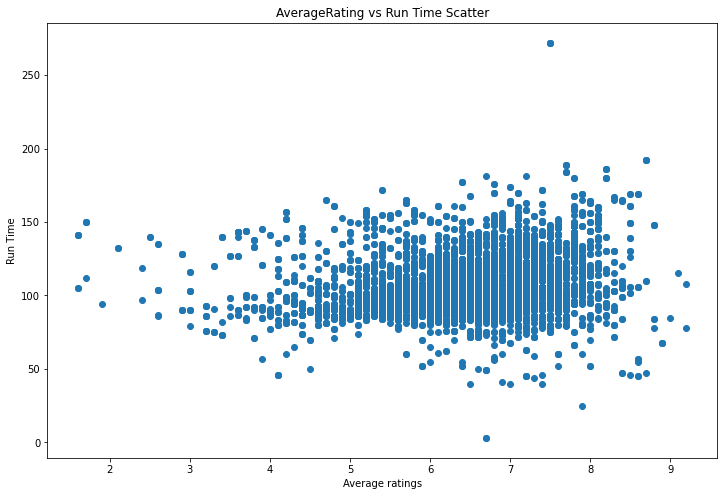

In [80]:
#plot a scatter plot to show relationship between averagerating and runtime minutes

fig = plt.figure(figsize =(12,8))
plt.scatter(SplitData1['averagerating'],SplitData1['runtime_minutes'])
plt.xlabel('Average ratings')
plt.ylabel('Run Time')
plt.title('AverageRating vs Run Time Scatter')

plt.show();

The above scatter plot seems to have a weak positive relationship which means there is minimal relationship between the Run time and Average ratings. This could tell that the viewers appreciated a movie irrespective of its run time. So Microsoft should not be worried about the Runtime of their movies but should concentrate on the content. In the spirit of Know your Competitor, we will look into the big five competing movie studio ,based on ratings, that Microsoft will be rivaling against

In [119]:
#sort the data based on the studio ratings of their movies in a descending order

grouped_data = SplitData1.groupby('studio').mean()

SplitData2 = grouped_data.sort_values('averagerating',ascending=False)

SplitData2.head()

,averagerating,numvotes,runtime_minutes,domestic_gross,foreign_gross,total_gross
studio,,,,,,
Trafalgar,8.8,2067.0,84.0,4200000.0,16100000.0,20300000.0
NAV,8.7,17.0,110.0,26300.0,250000.0,276300.0
GrtIndia,8.3,65656.0,167.0,20200000.0,234000000.0,254200000.0
SHO,8.2,6330.0,103.0,426000.0,0.0,426000.0
Pala.,8.1,608.0,85.0,81900.0,0.0,81900.0


According to the above data, the top five studios based on their ratings are Trafalgar,NAV,GrtIndia, SHO and Pala. We can look into another dataset to assertain if the same studios will major based on their popularity.

In [203]:
#read the tmdb movies csv
Movies2 =pd.read_csv('Data/tmdb.movies.csv')
Movies2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [204]:
#read the bom.movies_gross csv
movies_gross = pd.read_csv('Data/bom.movie_gross.csv')
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [205]:
#join the movie_gross and Movies 2 dataframes
Movies2Gross = movies_gross.join(Movies2.set_index('title'),how = 'inner',on = 'title' )
Movies2Gross.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
3,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
6,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [199]:
#select the studio,popularity,domestic_gross,foreign_gross and vote_average for reading and grouping
Movies2Grossdf = Movies2Gross[['studio','popularity','domestic_gross','foreign_gross','vote_average']]
Movies2Grossdf.head()

,studio,popularity,domestic_gross,foreign_gross,vote_average
0,BV,24.445,415000000.0,652000000,7.7
3,WB,27.920,292600000.0,535700000,8.3
4,P/DW,15.041,238700000.0,513900000,6.1
5,Sum.,20.340,300500000.0,398000000,6.0
6,Par.,28.515,312400000.0,311500000,6.8


In [206]:
#Group the new dataframe by studio, find mean and arrage in descending order so that the studio with highest mean popularity appears first
SortedMovie= Movies2Grossdf.groupby('studio').mean()
SortedMovie.sort_values('popularity',ascending = False)

,popularity,domestic_gross,vote_average
studio,,,
BV,19.682567,2.008534e+08,6.852885
MGM,18.528500,8.300000e+07,6.350000
WB,15.494283,9.053167e+07,6.504167
LG/S,15.285513,4.444359e+07,6.253846
Fox,15.235601,8.297246e+07,6.339130
...,...,...,...
ITL,0.809000,4.110000e+04,4.100000
UTMW,0.704000,6.250000e+04,6.000000
FEF,0.699000,6.130000e+05,4.800000


The top five studios based on their ratings are BV, MGM, WB, LG/S and Fox. Microsoft should invest in learning the crafts of these and the earlier studios, so as to be in position to battle them in business. Lets look into the correlation of the popularity,domestic gross and vote average of the studios. This will be a guiding tool for microsoft during their marketing strategies.

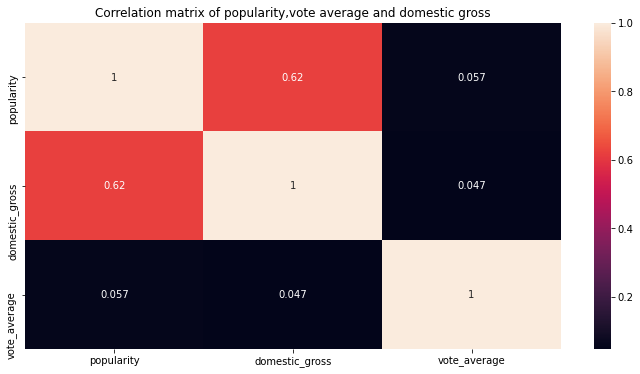

In [209]:
#plot a head graph to show how popularity,domestic gross and vote average of the studios correlated 
plt.figure(figsize=(12, 6))
sns.heatmap(SortedMovie.corr(), annot = True)
plt.title("Correlation matrix of popularity,vote average and domestic gross")
plt.show()

The average Popularity of a studio seem to have a strong positive effect on its domestic gross. This means that microsoft should employ necessary tacts to popularize their brand. However Vote Average does not seem to have much impact on a studios domestic gross and popularity.I am certain Microsoft would be intrested  in deciding the budgets to set aside for their new project. To enable them in making the decision we will look into how the budget of production affects its gross both locally and world wide. We will be guided by the Movie Budget data

In [157]:
#read the budget data to get insights of the dataframe
BudgetDf = pd.read_csv('Data/tn.movie_budgets.csv')
BudgetDf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [158]:
#Drop the id,release date and movie columns so as to remail with the numeric columns
columns_to_drop = ['id', 'release_date', 'movie']
Budget1 = BudgetDf.drop(columns_to_drop, axis=1)
Budget1.head()

,production_budget,domestic_gross,worldwide_gross
0,"$425,000,000","$760,507,625","$2,776,345,279"
1,"$410,600,000","$241,063,875","$1,045,663,875"
2,"$350,000,000","$42,762,350","$149,762,350"
3,"$330,600,000","$459,005,868","$1,403,013,963"
4,"$317,000,000","$620,181,382","$1,316,721,747"


In [159]:
Budget1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   production_budget  5782 non-null   object
 1   domestic_gross     5782 non-null   object
 2   worldwide_gross    5782 non-null   object
dtypes: object(3)
memory usage: 135.6+ KB


In [160]:
#Convert the columns to floats and remove dollar signs and commas to enable manipulations
numeric_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
Budget1[numeric_columns] = Budget1[numeric_columns].apply(lambda x: x.str.replace(r'[\$,]', '').astype(float))


In [213]:
#add a column worldwide profit as profit that by substracting production budget from worldwide gross
Budget1['profit'] = Budget1['worldwide_gross']-Budget1['production_budget']

In [212]:
Budget1.head()

,production_budget,domestic_gross,worldwide_gross,profit
0,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,317000000.0,620181382.0,1.316722e+09,9.997217e+08


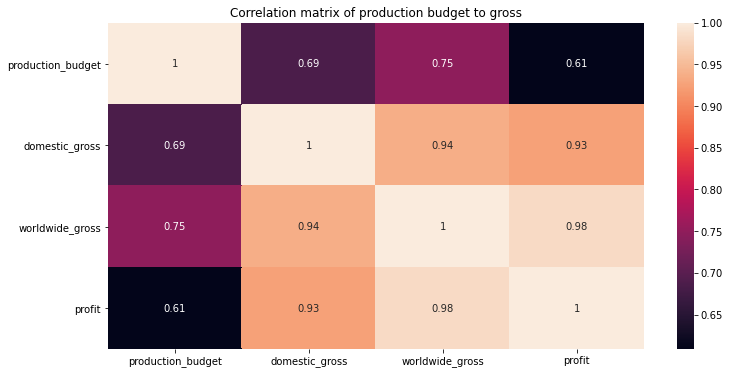

In [214]:
#plot a head graph to show how popularity,domestic gross and vote average of the studios correlated 
plt.figure(figsize=(12, 6))
sns.heatmap(Budget1.corr(), annot = True)
plt.title("Correlation matrix of production budget to gross")
plt.show()

The production budget seem to relatively impact both domestic and worldwide gross and overall profits. Microsoft should be keen in the amounts they budget for their movie production to attract popularity and definately make a profit

### Findings
From the above data analysis it is evident that;

**1.Top Grossing Genres:** Action, Adventure, Sci-Fi, and Fantasy genres have generated the highest total gross figures. This indicates that movies belonging to these genres seem  to perform well financially, which can be useful for Microsoft in determining their project choices.

**2.Top Rated Genres:** The Adventure, Drama, and Documentary genres were the top three based on their ratings. This information can help Microsoft cast their nets well in order to receive critical acclaim and positive reviews.

**3.Relation between Average Ratings and Mean Total Gross:** The data suggests a slight positive relationship between average ratings and mean total gross. This implies that movies with higher average ratings tend to perform slightly better in terms of total revenue. This correlation might indicate that well-received films have the potential to attract a larger audience and generate higher revenue.

**4.Runtime and Average Ratings:** The analysis shows that there is minimal relationship between the runtime of a movie and its average ratings. This suggests that the length of a film does not significantly impact on its overall reception. Microsoft shouldnt be worried about runtime but rather on contents.

**5.Top Rated Studios:** Based on the ratings from SplitData1, the top five studios are Trafalgar, NAV, GrtIndia, SHO, and Pala. According to Movies2Gross, the top five studios are BV, MGM, WB, LG/S, and Fox. These findings highlight the studios that have consistently produced well-received films, which can be valuable information for industry professionals and movie enthusiasts. This will help Microsoft know their competitors better.

**6.Effect of Studio Popularity on Domestic Gross:** The analysis indicates that there is a strong positive effect of a studio's popularity on its domestic gross. This suggests that more popular studios tend to achieve higher domestic box office revenues, likely due to their brand recognition and established audience base.

**7.Impact of Production Budget on Gross and Profits:** The data analysis suggests that the production budget has a relatively significant impact on both domestic and worldwide gross, as well as overall profits. This implies that the budget allocated to a movie can influence its financial performance, and studios should carefully consider budget decisions to optimize profitability.


### Recommendation

Based on the above findings, Microsoft stands guided in decision-making and strategies to maximize on film venture. To optimize success, the following recommendations may be beneficial:

**1. Genre Selection for Maximum Revenue:** As Action, Adventure, Sci-Fi, and Fantasy genres have demonstrated the highest total gross figures, Microsoft should consider focusing on projects within these genres. These genres tend to attract a broader audience and generate substantial box office revenue. Microsoft being a astart up studio will gain greater recognition by producing these genres.

**2.Balance of popularity and Financial Success:** The Adventure, Drama, and Documentary genres are top-rated based on critical acclaim. While prioritizing genres with high ratings can lead to critical success, Microsoft should ensure that they also chose popular genres for strong financial performance.

**3.Invest in Quality Productions:** The slight positive correlation between average ratings and mean total gross suggests that well-received movies can have a positive impact on overall revenue. Emphasize production quality, engaging storytelling, and memorable performances to enhance the chances of positive audience feedback. 

**4.Efficient Runtime Management:** As there is minimal relationship between runtime and average ratings, focus on storytelling and pacing rather than being worried about specific runtime. Allow the narrative to flow naturally, keeping the audience engaged throughout the movie.

**5.Learn the practices of top performing Competing Companies:** Given the strong positive effect of studio popularity on domestic gross. Microsoft can adopt one or two tricks from these studios.

**6.Optimal Budget Allocation:** Recognize the impact of production budgets on domestic and worldwide gross as well as overall profits. Carefully assess budget decisions, considering the genre, target audience and projected potential, to achieve a balance between investment and potential returns.

**7.Audience-Centric Approach:** Throughout the filmmaking process, Microsoft should keep the target audience in mind. They should regularly conduct market research and focus groups to understand audience preferences and expectations, including monitoring market trends, ratings and ensuring that the final product resonates with the intended viewers.



### Conclusion
In conclusion,this data analysis has provided Microsoft with valuable insights into the factors to put in mind while starting up the Film studio. By considering the above recomendations, Microsoft is now better placed to face the challenge. The identified factors, such as genre selection, production quality, and audience-centered strategies, will play crucial roles in determining success of Microsoft's film studio.

Film industry is an ever evolving field and so Microsoft should invest in a well conversant research team. This team will continuously monitor market trends, audience preferences, and industry developments in order to advice accordingly on the strategies to keep Microsoft in the game. Research-driven decision-making will enable Microsoft to respond effectively to emerging trends and create content that will be well accepterd by the target viewers.